In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker

In [2]:
SnP = pd.read_csv("SnP.csv")
SnP['Date'] = pd.to_datetime(SnP['Date'],dayfirst=False)
SnP = SnP.set_index("Date")

In [3]:
SnP.head(1)

,VOLATILITY_30D_SnP,VIX_Price
Date,,
2017-01-02,7.6,14.04


In [4]:
SnP[785:]

,VOLATILITY_30D_SnP,VIX_Price
Date,,
2020-01-06,7.84,13.85
2020-01-07,7.95,13.79
2020-01-08,7.80,13.45
2020-01-09,7.96,12.54
2020-01-10,8.01,12.56
...,...,...
2021-10-06,13.41,21.00
2021-10-07,13.60,19.54
2021-10-08,13.29,18.77


<AxesSubplot:xlabel='Date'>

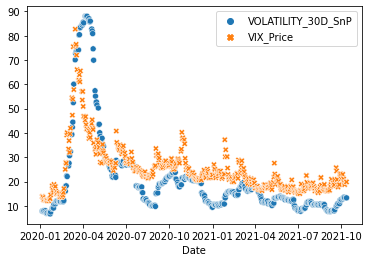

In [5]:
sns.scatterplot(data=SnP[785:])

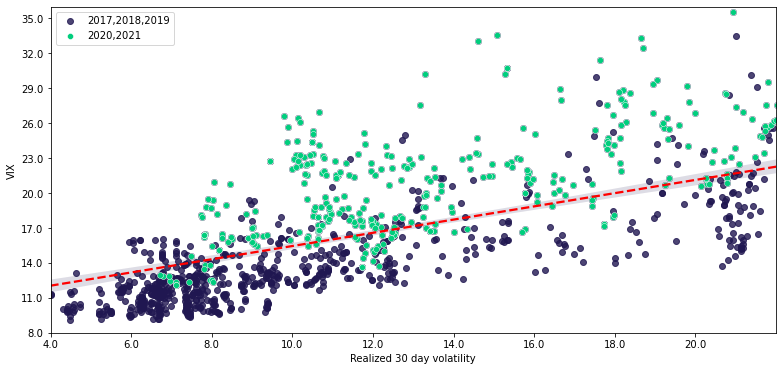

In [6]:
f, ax = plt.subplots(figsize=(13, 6))
sns.regplot(x="VOLATILITY_30D_SnP", y="VIX_Price", data=SnP,ax=ax,color='#201751',label="2017,2018,2019");
sns.scatterplot(data=SnP[785:], x="VOLATILITY_30D_SnP", y="VIX_Price",ax=ax,color='#00CE7D',label='2020,2021')
ax.set_xlim([4, 22])
ax.set_ylim([8, 36])
start, end = ax.get_xlim()
starty, endy = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(starty, endy, 3))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))
ax.xaxis.set_ticks(np.arange(start, end, 2))
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))
ax.set_xlabel("Realized 30 day volatility")
ax.set_ylabel("VIX")
ax.lines[0].set_linestyle("--")
ax.lines[0].set_color("r")
plt.savefig('SnP.png', bbox_inches='tight')

In [7]:
ESX50 = pd.read_csv("Volatility.csv")
ESX50['regional_timestamp'] = pd.to_datetime(ESX50['regional_timestamp'] ,dayfirst=True)
ESX50 = ESX50.set_index("regional_timestamp")

In [8]:
ESX50.head(1)

,realized_volatility,implied_volatility,difference_lagged,difference
regional_timestamp,,,,
2017-01-03,0.089028,0.173519,NaN,0.084491


In [9]:
ESX50['implied_volatility'] = ESX50['implied_volatility'].transform(lambda x : x*100*np.sqrt(252))

In [10]:
ESX50.head(1)

,realized_volatility,implied_volatility,difference_lagged,difference
regional_timestamp,,,,
2017-01-03,0.089028,275.452873,NaN,0.084491


In [11]:
ESX50['realized_volatility'] = ESX50['realized_volatility'].transform(lambda x : x*100*np.sqrt(252))

In [12]:
ESX50.head()

,realized_volatility,implied_volatility,difference_lagged,difference
regional_timestamp,,,,
2017-01-03,141.327978,275.452873,NaN,0.084491
2017-01-04,97.359048,261.359485,NaN,0.103311
2017-01-05,148.991008,253.676223,NaN,0.065945
2017-01-06,146.854002,243.548287,NaN,0.060912
2017-01-09,118.200530,246.281877,NaN,0.080684


<AxesSubplot:xlabel='realized_volatility', ylabel='implied_volatility'>

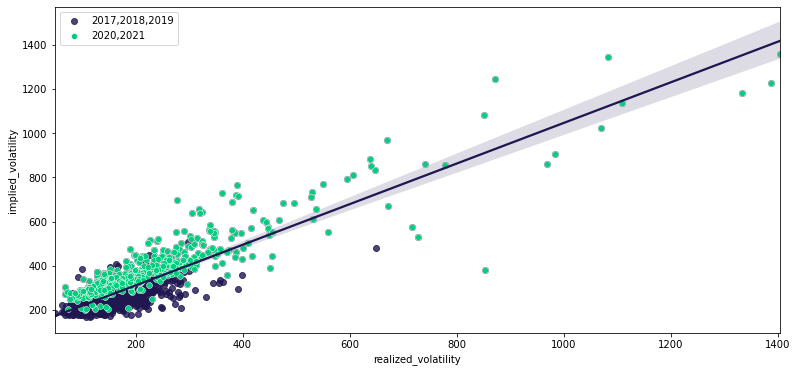

In [13]:
f, ax = plt.subplots(figsize=(13, 6))
sns.regplot(x="realized_volatility", y="implied_volatility", data=ESX50,ax=ax,color='#201751',label="2017,2018,2019");
sns.scatterplot(data=ESX50[785:], x="realized_volatility", y="implied_volatility",ax=ax,color='#00CE7D',label='2020,2021')
# ax.set_xlim([4, 22])
# ax.set_ylim([8, 36])
# start, end = ax.get_xlim()
# starty, endy = ax.get_ylim()

# ax.yaxis.set_ticks(np.arange(starty, endy, 3))
# ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))
# ax.xaxis.set_ticks(np.arange(start, end, 2))
# ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))
# ax.set_xlabel("Realized 30 day volatility")
# ax.set_ylabel("VSTOXX")
# ax.lines[0].set_linestyle("--")
# ax.lines[0].set_color("r")
#plt.savefig('ESX50.png', bbox_inches='tight')

In [14]:
Volume = pd.read_csv("Volume_Extended.csv").rename(columns={"Traded Contracts": "TC", "Open Interest Adjusted": "OI","Calendar Day":"Date"})
Volume['Date'] = pd.to_datetime(Volume['Date'] ,dayfirst=False)
Volume = Volume.set_index("Date")

In [15]:
Plot_diff = pd.concat([Volume,ESX50],axis=1)[1:]

In [16]:
Plot_diff.head()

,TC,OI,realized_volatility,implied_volatility,difference_lagged,difference
2017-01-03,2016386,3451692,141.327978,275.452873,NaN,0.084491
2017-01-04,1587820,3510508,97.359048,261.359485,NaN,0.103311
2017-01-05,1757456,3552537,148.991008,253.676223,NaN,0.065945
2017-01-06,1640236,3569379,146.854002,243.548287,NaN,0.060912
2017-01-09,1488946,3545220,118.200530,246.281877,NaN,0.080684


In [17]:
Plot_diff['difference'] = Plot_diff['difference'].transform(lambda x : x*100*np.sqrt(252))

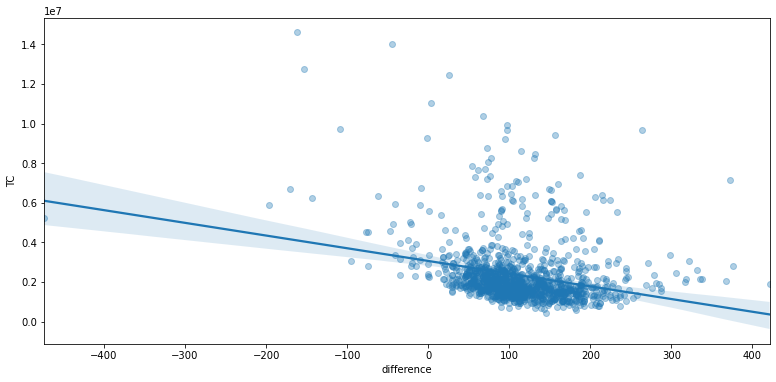

In [18]:
f, ax = plt.subplots(figsize=(13, 6))
sns.regplot(x="difference", y="TC", data=Plot_diff,ax=ax,scatter_kws={'alpha':0.35});
# ax.set_xlim([0,10])
# ax.set_ylim([0.2e7, 0.4e7])
# start, end = ax.get_xlim()
# starty, endy = ax.get_ylim()

# ax.yaxis.set_ticks(np.arange(starty, endy, 0.1e7))
# ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))
# ax.xaxis.set_ticks(np.arange(start, end, 1))
# ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))
# ax.set_xlabel("Realized 30 day volatility")
# ax.set_ylabel("VSTOXX")
# ax.lines[0].set_linestyle("--")

In [19]:
Plot_diff['difference_lagged'] = Plot_diff['difference_lagged'].transform(lambda x : x*100*np.sqrt(252))

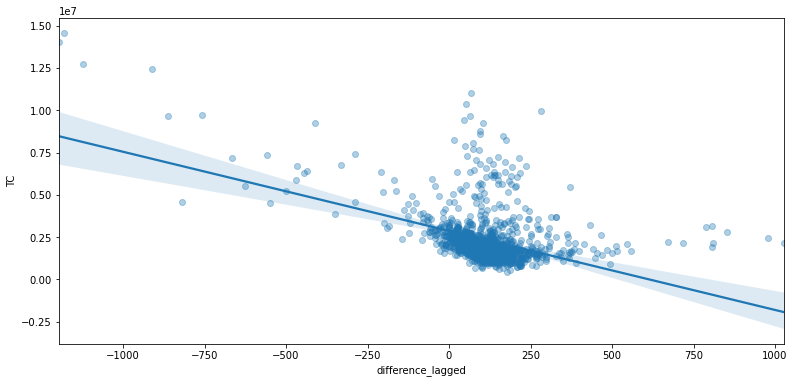

In [20]:
f, ax = plt.subplots(figsize=(13, 6))
sns.regplot(x="difference_lagged", y="TC", data=Plot_diff,ax=ax,scatter_kws={'alpha':0.35});


In [21]:
DAX = pd.read_csv("DAX.csv")
DAX['Dates'] = pd.to_datetime(DAX['Dates'],dayfirst=False)
DAX = DAX.set_index("Dates")

In [22]:
DAX.head(2)

,VOLATILITY_30D,PX_LAST
Dates,,
2017-01-02,11.44,17.79
2017-01-03,11.51,17.29


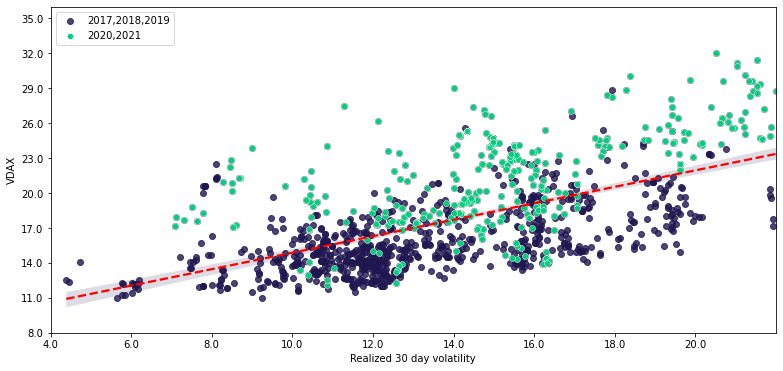

In [23]:
f, ax = plt.subplots(figsize=(13, 6))
sns.regplot(x="VOLATILITY_30D", y="PX_LAST", data=DAX,ax=ax,color='#201751',label="2017,2018,2019");
sns.scatterplot(data=DAX[785:], x="VOLATILITY_30D", y="PX_LAST",ax=ax,color='#00CE7D',label="2020,2021")
ax.set_xlim([4, 22])
ax.set_ylim([8, 36])
start, end = ax.get_xlim()
starty, endy = ax.get_ylim()
ax.legend(loc=2)
ax.yaxis.set_ticks(np.arange(starty, endy, 3))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))
ax.xaxis.set_ticks(np.arange(start, end, 2))
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))
ax.set_xlabel("Realized 30 day volatility")
ax.set_ylabel("VDAX")
ax.lines[0].set_linestyle("--")
ax.lines[0].set_color("r")
plt.savefig('DAX.png', bbox_inches='tight')

In [24]:
NASDAQ = pd.read_csv("Nasdaq.csv")
NASDAQ['Dates'] = pd.to_datetime(NASDAQ['Dates'],dayfirst=False)
NASDAQ = NASDAQ.set_index("Dates")

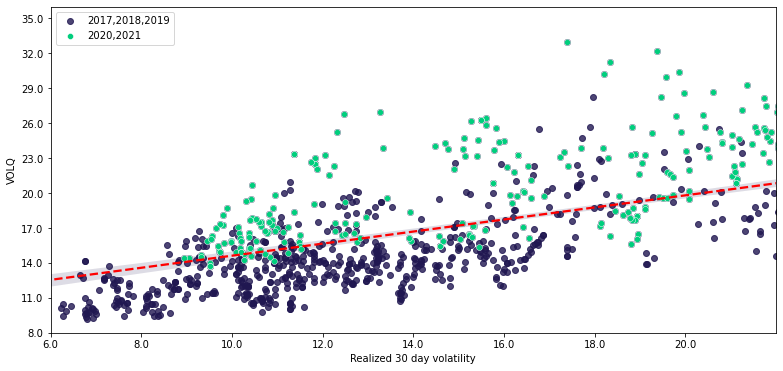

In [25]:
f, ax = plt.subplots(figsize=(13, 6))
sns.regplot(x="VOLATILITY_30D", y="PX_LAST", data=NASDAQ,ax=ax,color='#201751',label="2017,2018,2019");
sns.scatterplot(data=NASDAQ[785:], x="VOLATILITY_30D", y="PX_LAST",ax=ax,color='#00CE7D',label="2020,2021")
ax.set_xlim([6, 22])
ax.set_ylim([8, 36])
start, end = ax.get_xlim()
starty, endy = ax.get_ylim()
ax.legend(loc=2)
ax.yaxis.set_ticks(np.arange(starty, endy, 3))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))
ax.xaxis.set_ticks(np.arange(start, end, 2))
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))
ax.set_xlabel("Realized 30 day volatility")
ax.set_ylabel("VOLQ")
ax.lines[0].set_linestyle("--")
ax.lines[0].set_color("r")
plt.savefig('NASDAQ.png', bbox_inches='tight')

In [26]:
CAC = pd.read_csv("CAC40.csv")
CAC['Dates'] = pd.to_datetime(CAC['Dates'],dayfirst=False)
CAC = CAC.set_index("Dates")

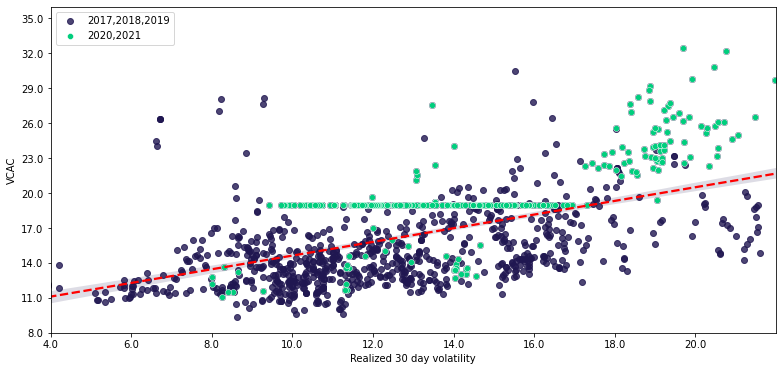

In [27]:
f, ax = plt.subplots(figsize=(13, 6))
sns.regplot(x="VOLATILITY_30D", y="PX_LAST", data=CAC,ax=ax,color='#201751',label="2017,2018,2019");
sns.scatterplot(data=CAC[785:], x="VOLATILITY_30D", y="PX_LAST",ax=ax,color='#00CE7D',label="2020,2021")
ax.set_xlim([4, 22])
ax.set_ylim([8, 36])
start, end = ax.get_xlim()
starty, endy = ax.get_ylim()
ax.legend(loc=2)
ax.yaxis.set_ticks(np.arange(starty, endy, 3))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))
ax.xaxis.set_ticks(np.arange(start, end, 2))
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))
ax.set_xlabel("Realized 30 day volatility")
ax.set_ylabel("VCAC")
ax.lines[0].set_linestyle("--")
ax.lines[0].set_color("r")
plt.savefig('CAC.png', bbox_inches='tight')

In [28]:
AEX = pd.read_csv("AEX.csv")
AEX['Dates'] = pd.to_datetime(AEX['Dates'],dayfirst=False)
AEX = AEX.set_index("Dates")

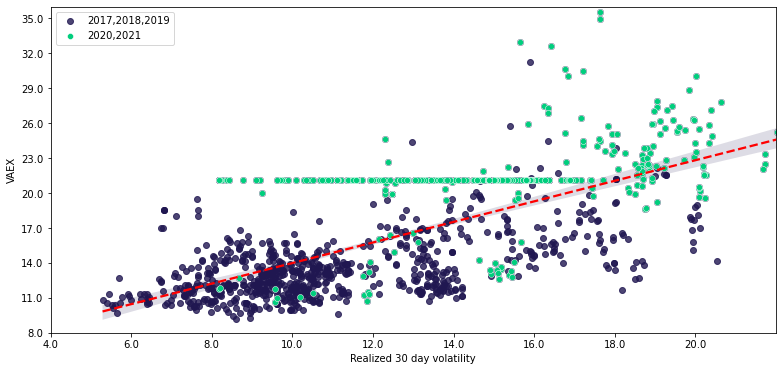

In [29]:
f, ax = plt.subplots(figsize=(13, 6))
sns.regplot(x="VOLATILITY_30D", y="PX_LAST", data=AEX,ax=ax,color='#201751',label="2017,2018,2019");
sns.scatterplot(data=AEX[785:], x="VOLATILITY_30D", y="PX_LAST",ax=ax,color='#00CE7D',label="2020,2021")
ax.set_xlim([4, 22])
ax.set_ylim([8, 36])
start, end = ax.get_xlim()
starty, endy = ax.get_ylim()
ax.legend(loc=2)
ax.yaxis.set_ticks(np.arange(starty, endy, 3))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))
ax.xaxis.set_ticks(np.arange(start, end, 2))
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))
ax.set_xlabel("Realized 30 day volatility")
ax.set_ylabel("VAEX")
ax.lines[0].set_linestyle("--")
ax.lines[0].set_color("r")
plt.savefig('AEX.png', bbox_inches='tight')

In [30]:
AEX.head(10)

,VOLATILITY_30D,PX_LAST
Dates,,
2017-01-03,9.43,15.89
2017-01-04,9.45,15.04
2017-01-05,9.51,14.68
2017-01-06,9.53,14.13
2017-01-09,8.75,14.27
2017-01-10,8.76,14.15
2017-01-11,8.42,14.27
2017-01-12,8.34,14.01
2017-01-13,7.95,13.09


# Make the Regplot for pre - post covid

In [31]:
data_ = pd.read_csv("StructuralBreakViz.csv")

In [32]:
Pre_covid = data_[:783]
Post_covid = data_[783:]
pd.to_datetime(Pre_covid['Date'],dayfirst=False)
Pre_covid = Pre_covid.set_index("Date")
pd.to_datetime(Post_covid['Date'],dayfirst=False)
Post_covid = Post_covid.set_index("Date")

In [33]:
Pre_covid.head(1)
Post_covid.head(1)

,Volume,difference
Date,,
2020-03-05,1.122900e+06,9.270472


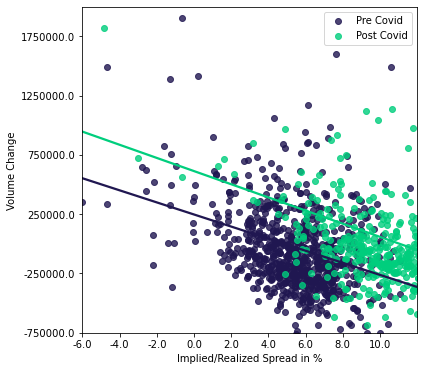

In [34]:
# create the figure and axes
fig, ax = plt.subplots(figsize=(6, 6))

# add the plots for each dataframe
sns.regplot(x='difference', y='Volume', data=Pre_covid, fit_reg=True, ci=None, ax=ax,color='#201751', label='Pre Covid')
sns.regplot(x='difference', y='Volume', data=Post_covid, fit_reg=True, ci=None, ax=ax, label='Post Covid',color='#00CE7D')
ax.set_xlim([-6, 12])
ax.set_ylim([-0.75e6, 2e6])
start, end = ax.get_xlim()
starty, endy = ax.get_ylim()

ax.yaxis.set_ticks(np.arange(starty, endy, 0.5e6))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))
ax.xaxis.set_ticks(np.arange(start, end, 2))
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))

ax.set(ylabel='Volume Change', xlabel='Implied/Realized Spread in %')
ax.legend()
plt.savefig('prepost.png', bbox_inches='tight')

## Volume

In [35]:
volume = pd.read_csv("Volume_Extended.csv").rename(columns={"Traded Contracts": "TC", "Open Interest Adjusted": "OI","Calendar Day":"Date"})
volume = volume.set_index('Date')

In [36]:
volume.head()

,TC,OI
Date,,
1/2/2017,501458,3414414
1/3/2017,2016386,3451692
1/4/2017,1587820,3510508
1/5/2017,1757456,3552537
1/6/2017,1640236,3569379


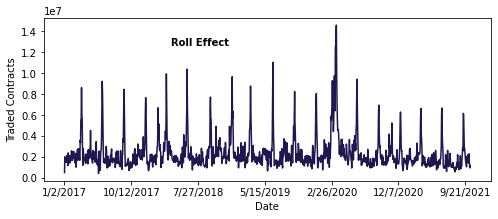

In [37]:
fig, ax = plt.subplots(figsize=(8, 3))
d = volume['TC'].plot.line(color='#201751',ax=ax)
ax.set(ylabel='Traded Contracts', xlabel='Date');
#ax.annotate("Roll Effect ",xy=(2,0.8),weight='bold')
#ax.arrow(1.70,0.40,-0.5,-0.03,head_width = 0.007)
#ax.arrow(1.70,0.40,-0.5,-0.03,head_width = 0.007)
#ax.text(0.5,0.65,"Roll Effect")
plt.text(0.35, 0.85,'Roll Effect', ha='center', va='center', transform=ax.transAxes,weight='bold')
#ax.arrow(0.2,0.8,0.1,0.1)
plt.savefig('beforecleaning.png', bbox_inches='tight')

In [38]:
Volatility = pd.read_csv("Volatility.csv")
Volatility = Volatility.set_index('regional_timestamp')

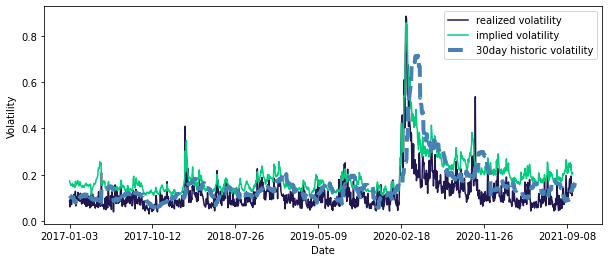

In [67]:
fig, ax = plt.subplots(figsize=(10, 4))
Volatility['realized_volatility'].plot.line(color='#201751',ax=ax)
Volatility['implied_volatility'].plot.line(color='#00CE7D',ax=ax)
Bench['realized_volatility'].plot.line(color='steelblue',ax=ax,lw=4,style='--')
ax.set(ylabel='Volatility', xlabel='Date');
ax.legend(["realized volatility", "implied volatility","30day historic volatility"]);
plt.savefig('reconstructed.png', bbox_inches='tight')

In [60]:
Bench = pd.read_csv("Benchmark.csv")
Bench = Bench.set_index('regional_timestamp')
Bench['realized_volatility'] = Bench['realized_volatility']/100*np.sqrt(252)

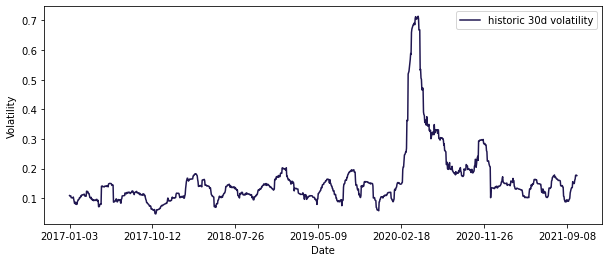

In [61]:
fig, ax = plt.subplots(figsize=(10, 4))
Bench['realized_volatility'].plot.line(color='#201751',ax=ax)
#Bench['implied_volatility'].plot.line(color='#00CE7D',ax=ax)
ax.set(ylabel='Volatility', xlabel='Date');
ax.legend(["historic 30d volatility", "implied volatility"]);

# GAP Chart

In [42]:
Data = pd.read_csv("PlotGap.csv")
Data['Dates'] = pd.to_datetime(Data['Dates'],dayfirst=False)
Data = Data.set_index("Dates")

In [43]:
Data.tail()

,VIX,VSTOXX,ESX50,SnP500
Dates,,,,
2021-12-06,27.18,30.04,4137.11,4591.67
2021-12-07,21.89,24.87,4276.20,4686.75
2021-12-08,19.90,24.71,4233.09,4701.21
2021-12-09,21.58,23.52,4208.30,4667.45
2021-12-10,21.58,23.52,4208.30,4667.45


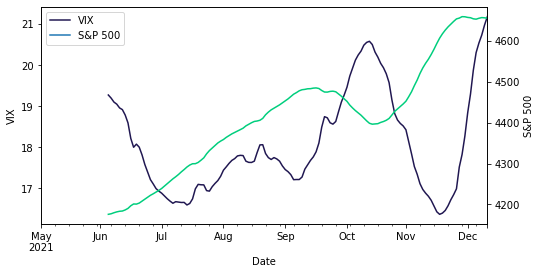

In [44]:
fig, ax = plt.subplots(figsize=(8, 4))
ax2=ax.twinx()
lns1 = Data['VIX'].rolling(25).mean().plot.line(color='#201751',ax=ax, label ='VIX')
lns2 = Data['SnP500'].rolling(25).mean().plot.line(color='#00CE7D',ax=ax2, label = 'S&P500')
ax.plot(np.nan, label = 'S&P 500')  # Make an agent in ax
ax.legend(loc=0)
ax.set(ylabel='VIX', xlabel='Date');
ax2.set(ylabel='S&P 500');
plt.savefig('Trend.png', bbox_inches='tight')